# The Data

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("data01.csv")
df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [27]:
df.shape

(1177, 51)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [29]:
#convert columns to category
columns_to_category= ['outcome', 'gendera','hypertensive','atrialfibrillation','CHD with no MI','diabetes','deficiencyanemias','depression','Hyperlipemia','Renal failure','COPD']
df[columns_to_category]= df[columns_to_category].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   group                     1177 non-null   int64   
 1   ID                        1177 non-null   int64   
 2   outcome                   1176 non-null   category
 3   age                       1177 non-null   int64   
 4   gendera                   1177 non-null   category
 5   BMI                       962 non-null    float64 
 6   hypertensive              1177 non-null   category
 7   atrialfibrillation        1177 non-null   category
 8   CHD with no MI            1177 non-null   category
 9   diabetes                  1177 non-null   category
 10  deficiencyanemias         1177 non-null   category
 11  depression                1177 non-null   category
 12  Hyperlipemia              1177 non-null   category
 13  Renal failure             1177 non-null   catego

In [30]:
df.isnull().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

# Cleaning the Data

In [31]:
# We don't need the group and ID in our model
df.drop(['group','ID'],axis=1,inplace=True)

In [32]:
# droping duplicate value
df.drop_duplicates()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,0.0,72,1,37.588179,0,0,0,1,1,0,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,0.0,75,2,NaN,0,0,0,0,1,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,0.0,83,2,26.572634,0,0,0,0,1,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,0.0,43,2,83.264629,0,0,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,0.0,75,2,31.824842,1,0,0,0,1,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,0.0,62,1,25.516870,1,1,0,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,0.0,78,1,25.822710,0,1,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,0.0,85,2,23.891779,1,1,0,1,1,0,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,0.0,79,2,35.288554,0,0,1,1,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25


In [33]:
# droping columns with 1 unique value
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)

We have 1 null value in our categorical data. we have remove it.

In [34]:
# cheking for unique value in outcome
df.outcome.unique()

/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/pretty.py:778: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


[0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]

In [35]:
# droping the null value from outcome variable
df = df.dropna(subset=['outcome'])

In [36]:
df.describe()

,age,BMI,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1176.000000,962.000000,1164.000000,1161.000000,1161.000000,1164.000000,1158.000000,1164.000000,1141.000000,1176.000000,...,1176.000000,1175.000000,1176.000000,1176.000000,1176.000000,885.000000,1176.000000,948.000000,883.000000,1176.000000
mean,74.047619,30.188278,84.575848,117.995035,59.534497,20.801511,36.677286,96.272900,1899.276512,31.910614,...,138.897009,8.501789,102.292048,13.923755,2.120286,7.378532,26.912116,1.853426,45.535382,48.710034
std,13.437241,9.325997,16.018701,17.367618,10.684681,4.002987,0.607558,2.298002,1272.363631,5.203007,...,4.146172,0.571683,5.334562,2.653463,0.251608,0.067320,5.169696,0.983819,12.711271,12.872604
min,19.000000,13.346801,36.000000,75.000000,24.736842,11.137931,33.250000,75.916667,0.000000,20.311111,...,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,65.000000,24.326461,72.371250,105.391304,52.173913,17.925694,36.286045,95.000000,980.000000,28.154375,...,136.666667,8.150000,99.000000,12.250000,1.955556,7.334615,23.452020,1.200000,37.038462,40.000000
50%,77.000000,28.312474,83.610799,116.128205,58.461538,20.372308,36.650794,96.452273,1675.000000,30.795455,...,139.250000,8.500000,102.516667,13.666667,2.092582,7.380000,26.500000,1.600000,43.000000,55.000000
75%,85.000000,33.633509,95.907143,128.625000,65.464286,23.391200,37.021991,97.917500,2500.000000,35.003125,...,141.600000,8.869375,105.571429,15.404167,2.241964,7.430000,29.881250,2.200000,50.585784,55.000000
max,99.000000,104.970366,135.708333,203.000000,107.000000,40.900000,39.132478,100.000000,8820.000000,55.425000,...,154.736842,10.950000,122.526316,25.500000,4.072727,7.580000,47.666667,8.333333,98.600000,75.000000


In [37]:
# filling null with median
df = df.fillna(df.median())

/var/folders/3q/3__77hfn7kv37k_xf29f__t00000gq/T/ipykernel_4484/1512416076.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


In [38]:
# cheling for null value again
df.isnull().sum()

outcome                     0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT                          0
INR                         0
NT-proBNP 

Now we can see here is no null value.

In [39]:
df.describe()

,age,BMI,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,74.047619,29.846932,84.566001,117.971224,59.520811,20.797132,36.676880,96.274731,1892.601616,31.910614,...,138.897009,8.501787,102.292048,13.923755,2.120286,7.378895,26.912116,1.804292,44.903693,48.710034
std,13.437241,8.465107,15.936989,17.257678,10.616945,3.982728,0.602896,2.286308,1253.850105,5.203007,...,4.146172,0.571440,5.334562,2.653463,0.251608,0.058396,5.169696,0.888894,11.067475,12.872604
min,19.000000,13.346801,36.000000,75.000000,24.736842,11.137931,33.250000,75.916667,0.000000,20.311111,...,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,65.000000,25.274510,72.535035,105.490385,52.286102,17.954237,36.287037,95.000000,997.250000,28.154375,...,136.666667,8.150000,99.000000,12.250000,1.955556,7.350000,23.452020,1.300000,39.000000,40.000000
50%,77.000000,28.312474,83.610799,116.128205,58.461538,20.372308,36.650794,96.452273,1675.000000,30.795455,...,139.250000,8.500000,102.516667,13.666667,2.092582,7.380000,26.500000,1.600000,43.000000,55.000000
75%,85.000000,32.104250,95.613929,128.489286,65.409759,23.366983,37.016534,97.894608,2475.000000,35.003125,...,141.600000,8.869063,105.571429,15.404167,2.241964,7.410000,29.881250,2.002273,47.275974,55.000000
max,99.000000,104.970366,135.708333,203.000000,107.000000,40.900000,39.132478,100.000000,8820.000000,55.425000,...,154.736842,10.950000,122.526316,25.500000,4.072727,7.580000,47.666667,8.333333,98.600000,75.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 1176
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   outcome                   1176 non-null   category
 1   age                       1176 non-null   int64   
 2   gendera                   1176 non-null   category
 3   BMI                       1176 non-null   float64 
 4   hypertensive              1176 non-null   category
 5   atrialfibrillation        1176 non-null   category
 6   CHD with no MI            1176 non-null   category
 7   diabetes                  1176 non-null   category
 8   deficiencyanemias         1176 non-null   category
 9   depression                1176 non-null   category
 10  Hyperlipemia              1176 non-null   category
 11  Renal failure             1176 non-null   category
 12  COPD                      1176 non-null   category
 13  heart rate                1176 non-null   float6

## EDA 

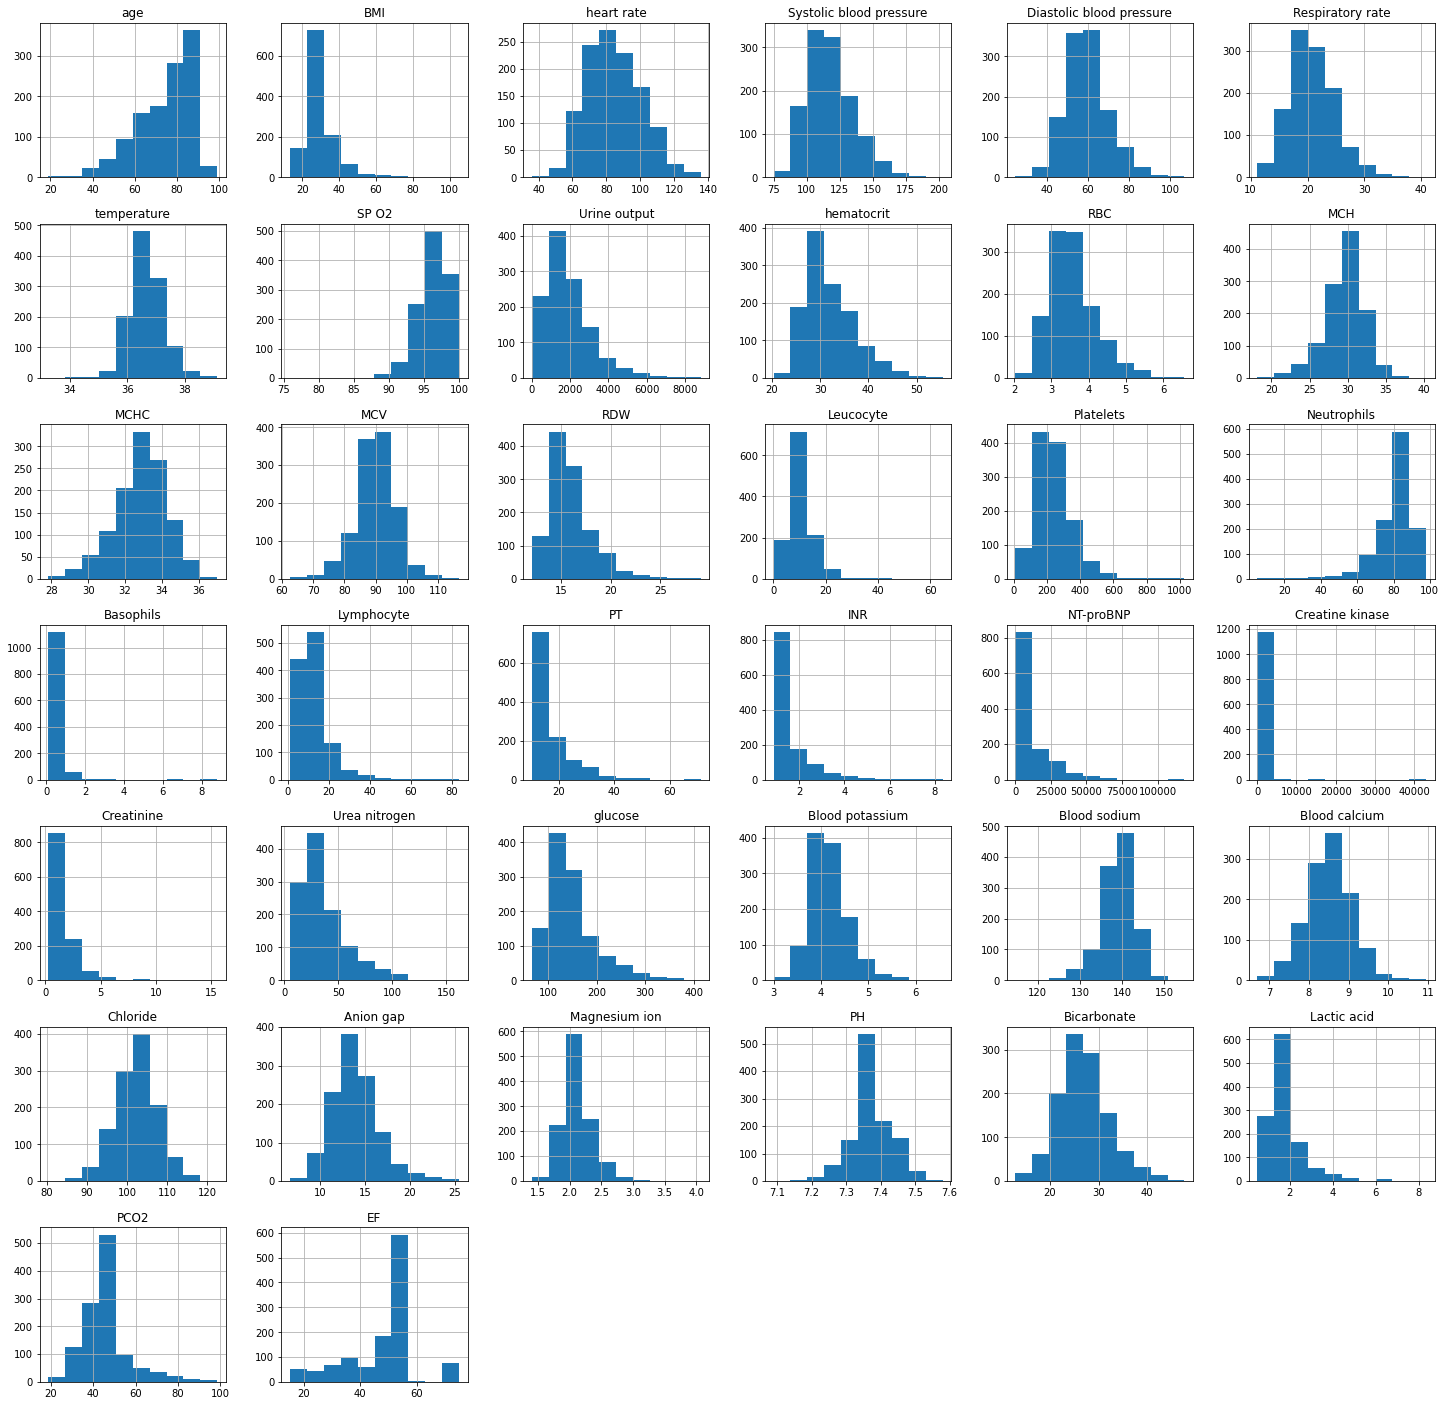

In [41]:
#Hisograms of model features
df.hist(figsize = (25,25));

In [42]:
#function for getting lower and upper bounds for outliers 
def bounds(column):
    q1,q3 = df[column].quantile([0.25,0.75])
    lb_fixed_acidity = q1 - (q3 - q1) * 1.5
    up_fixed_acidity = q3 + (q3 - q1) * 1.5
    return [lb_fixed_acidity,up_fixed_acidity]

#function for finding outliers for a dataframe column 
def outliers(column):
    b = bounds(column)
    outliers = df[(df[column]<b[0]) | (df[column]>b[1])][column]
    return outliers

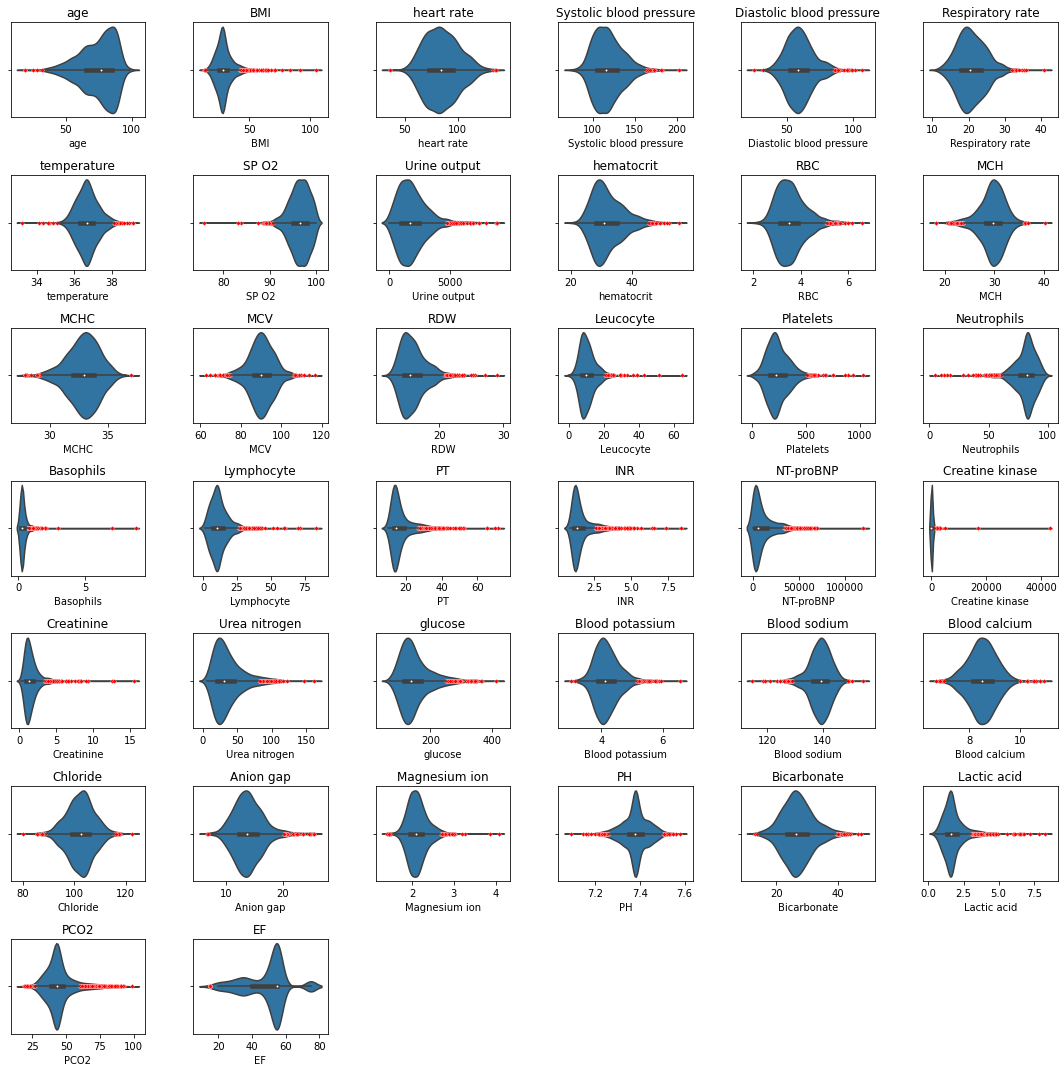

In [43]:
#set up subplot variables for ease of visualization
fig, ax = plt.subplots(7,6,figsize=(15,15))
ax = ax.ravel()
pos = 0
#plot violin plots with data points outside of the lower and upper bounds marked 
for column in df.columns:
    if (df[column].dtype != "category"):
        sns.violinplot(data = df, x = column, ax=ax[pos])
        sns.scatterplot(x=outliers(column),y=0,marker='D',color='red',ax=ax[pos],s=10)
        ax[pos].set_title(column)
        pos+=1

#formatting subplot
plt.tight_layout()
#remove unused subplot axes
for i in range(38,42):
        plt.delaxes(ax[i])

<AxesSubplot:>

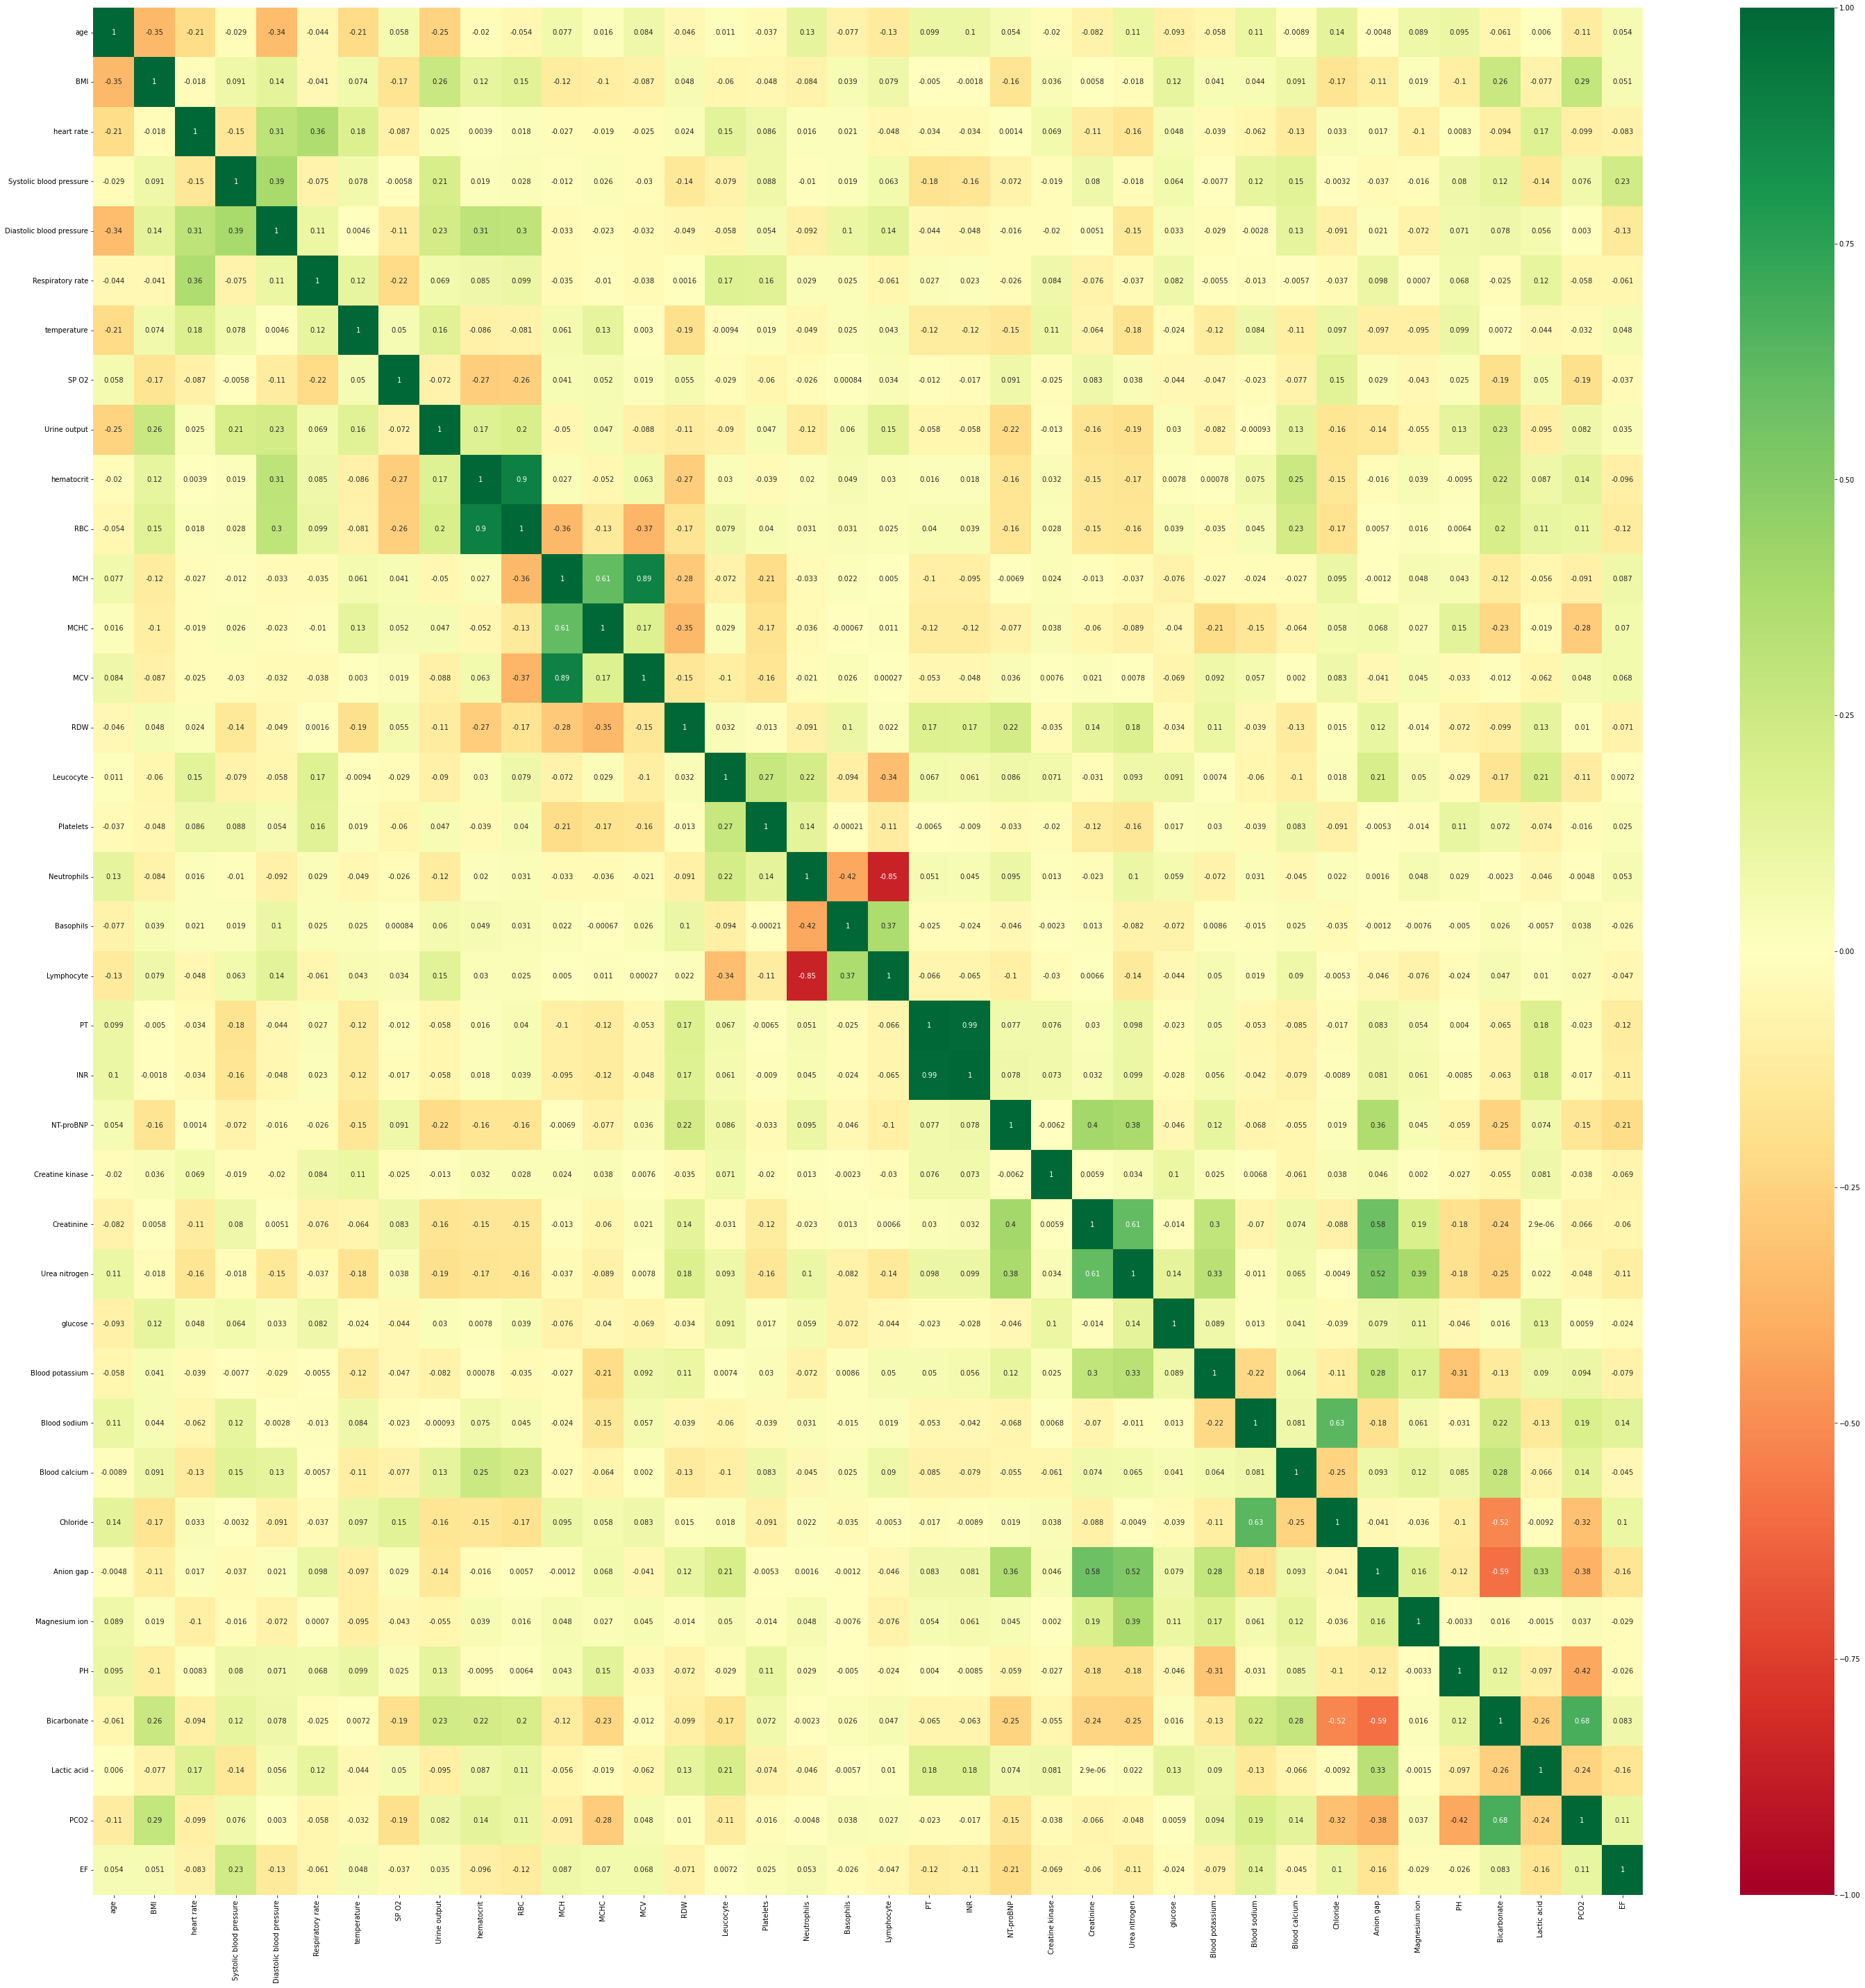

In [44]:
#correlation coefficient heatmap
plt.figure(figsize=(50,50))
sns.heatmap(df.select_dtypes(exclude="category").corr(),annot=True,cmap="RdYlGn",vmin=-1,vmax=1,center = 0)

In [45]:
#sns.pairplot(df.select_dtypes(exclude="category"))

In [46]:
df = df[df['age'] >35]
df = df[df['BMI'] < 50]
df = df[df['heart rate'] < 130]
df = df[df['Systolic blood pressure'] < 170]
df = df[df['Diastolic blood pressure'] < 95]
df = df[df['Diastolic blood pressure'] > 30]
df = df[df['Respiratory rate'] < 33]
df = df[df['temperature'] < 38.5]
df = df[df['temperature'] > 34.5]
df = df[df['SP O2'] > 88]
df = df[df['Urine output'] < 6000]
df = df[df['hematocrit'] < 50]
df = df[df['RBC'] < 5.8]
df = df[df['MCH'] > 20]
df = df[df['MCH'] < 40]
df = df[df['MCHC'] >28]
df = df[df['MCHC'] <37]
df = df[df['MCV'] > 68]
df = df[df['MCV'] < 111]
df = df[df['RDW'] < 25]
df = df[df['Leucocyte'] < 30]
df = df[df['Platelets'] < 800]
df = df[df['Neutrophils'] > 30]
df = df[df['Basophils'] < 2]
df = df[df['Lymphocyte'] < 50]
df = df[df['PT'] < 60]
df = df[df['INR'] < 6]
df = df[df['NT-proBNP'] < 70000]
df = df[df['Creatine kinase'] < 6000]
df = df[df['Creatinine'] < 9]
df = df[df['Urea nitrogen'] < 112]
df = df[df['glucose'] < 360]
df = df[df['Blood potassium'] < 6]
df = df[df['Blood sodium'] >125]
df = df[df['Blood sodium'] <150]
df = df[df['Chloride'] <120]
df = df[df['Chloride'] >81]
df = df[df['Anion gap'] < 23]
df = df[df['Anion gap'] > 7.5]
df = df[df['Magnesium ion'] < 3.5]
df = df[df['PH'] > 7.1]
df = df[df['Bicarbonate'] < 45]
df = df[df['Lactic acid'] < 5.5]
df = df[df['PCO2'] < 95]

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015 entries, 0 to 1176
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   outcome                   1015 non-null   category
 1   age                       1015 non-null   int64   
 2   gendera                   1015 non-null   category
 3   BMI                       1015 non-null   float64 
 4   hypertensive              1015 non-null   category
 5   atrialfibrillation        1015 non-null   category
 6   CHD with no MI            1015 non-null   category
 7   diabetes                  1015 non-null   category
 8   deficiencyanemias         1015 non-null   category
 9   depression                1015 non-null   category
 10  Hyperlipemia              1015 non-null   category
 11  Renal failure             1015 non-null   category
 12  COPD                      1015 non-null   category
 13  heart rate                1015 non-null   float6

<AxesSubplot:>

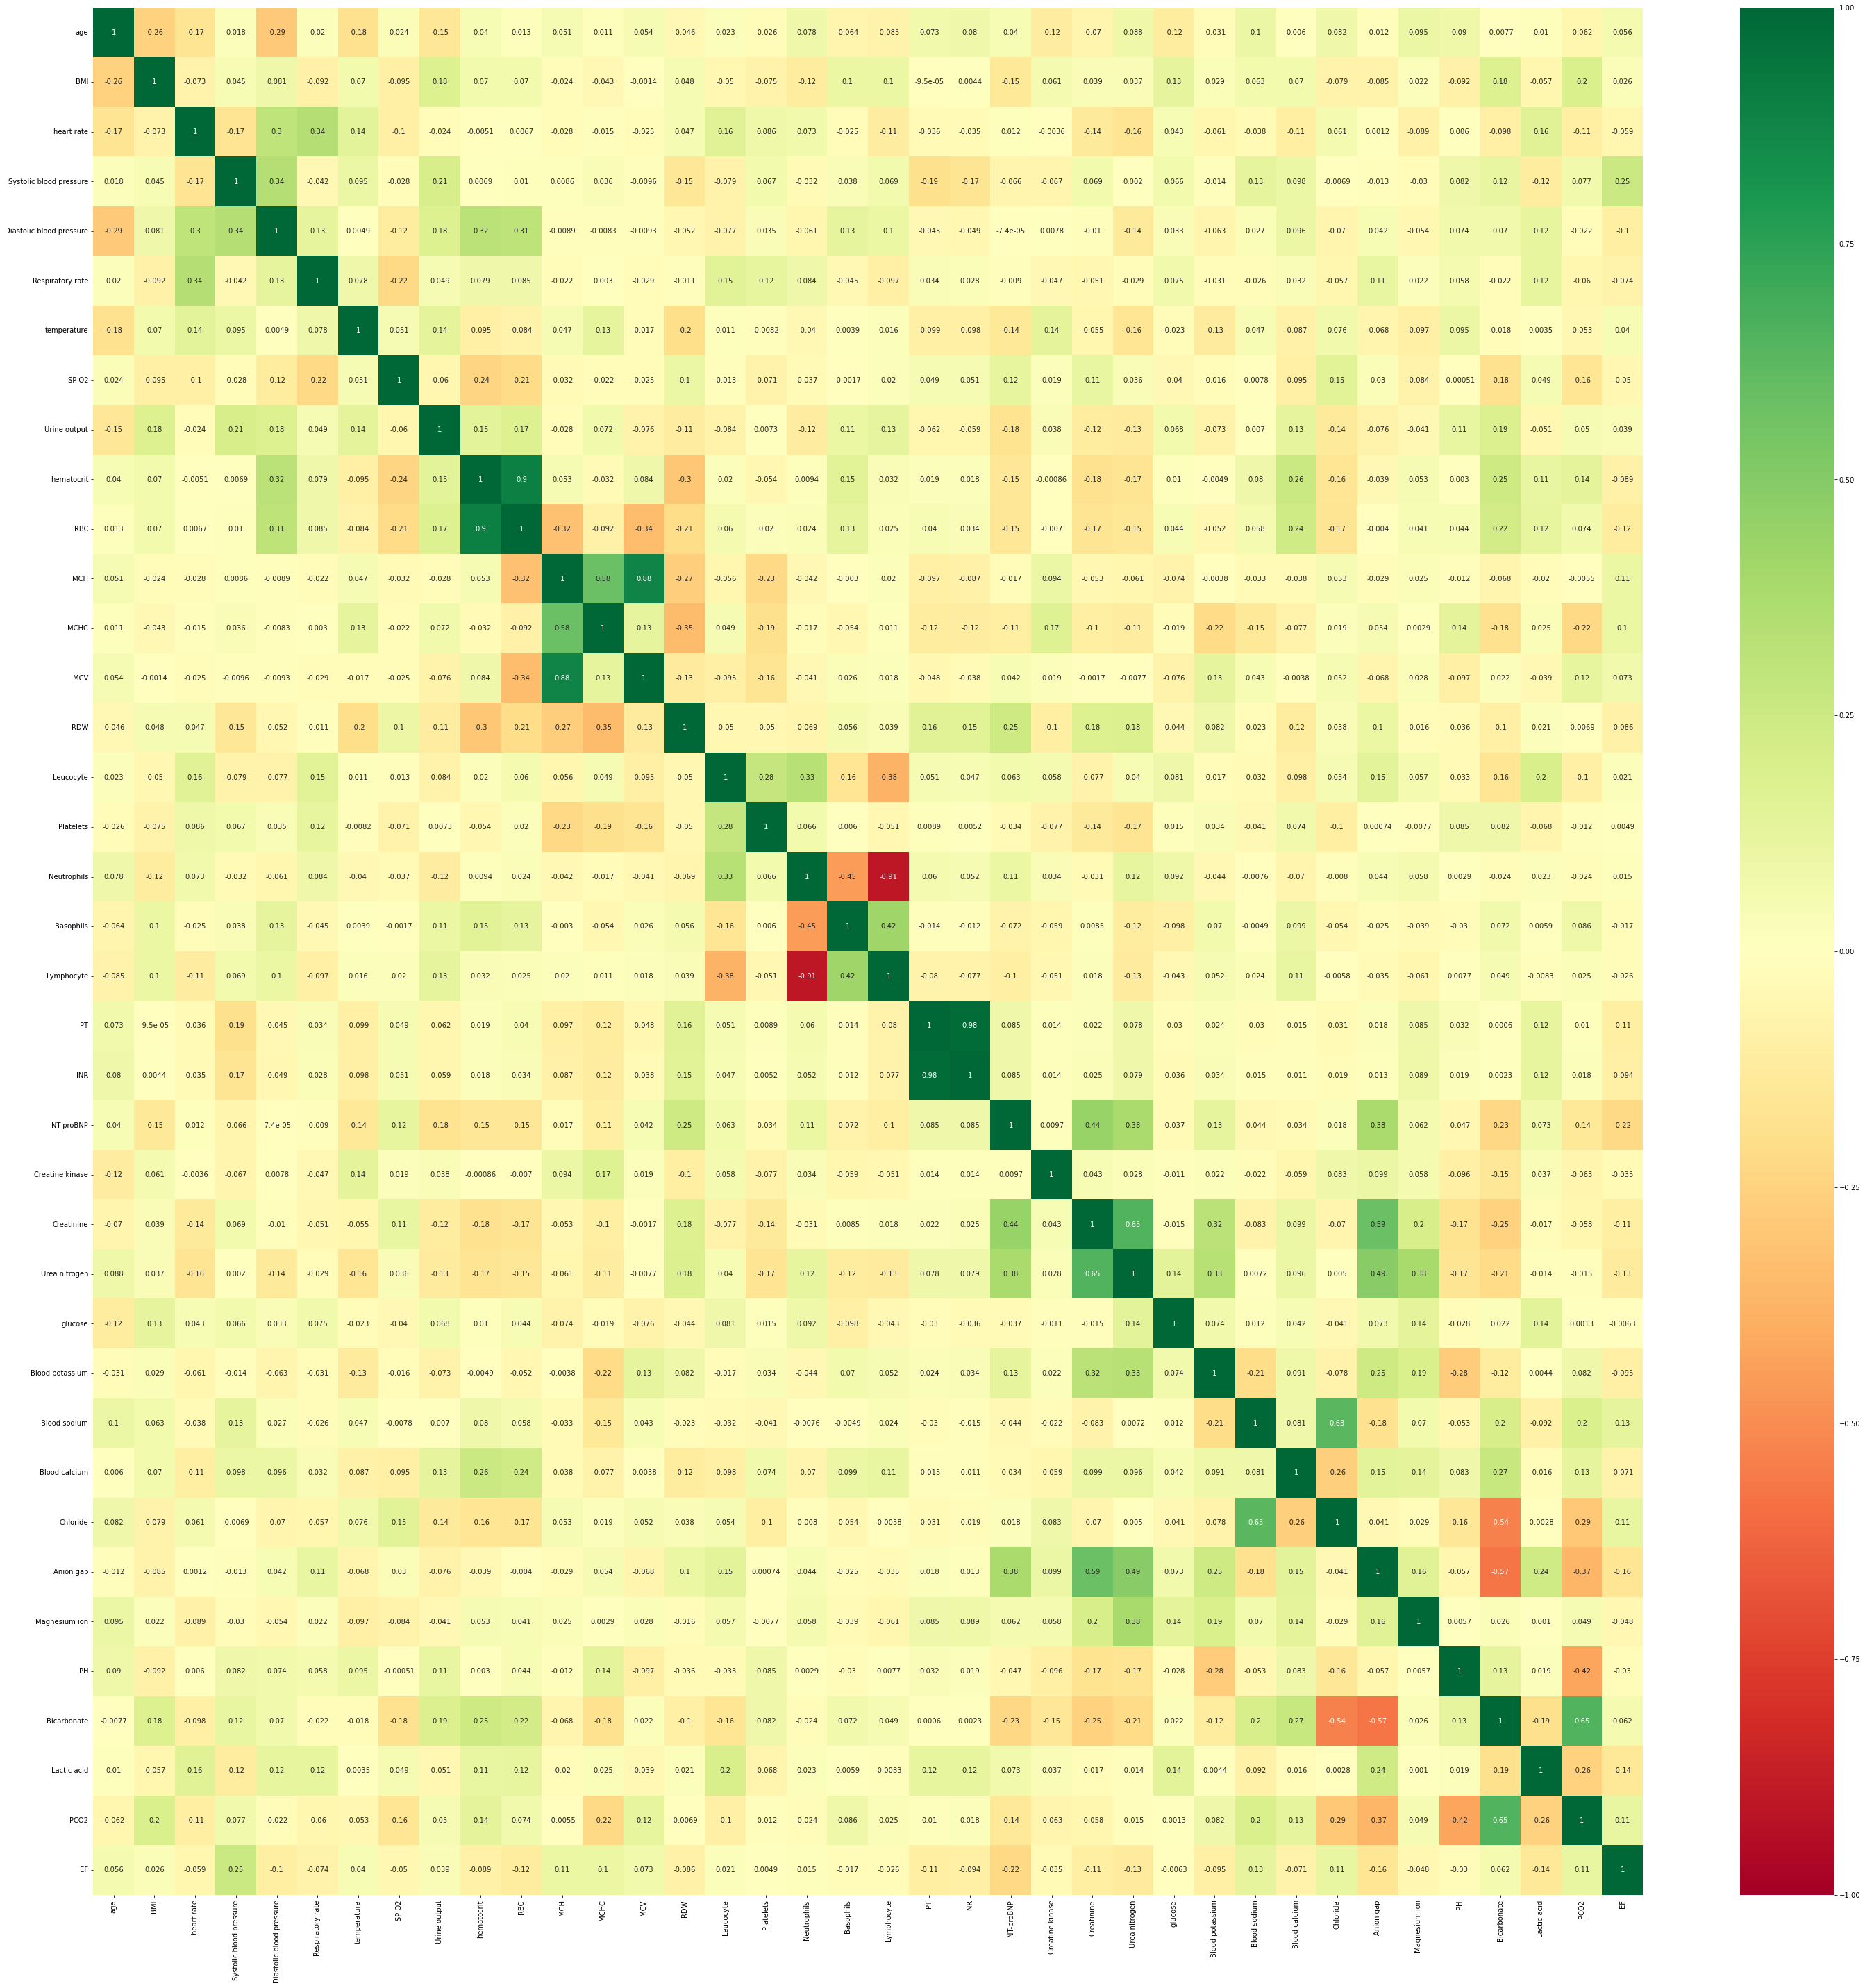

In [48]:
plt.figure(figsize=(50,50))
sns.heatmap(df.select_dtypes(exclude="category").corr(),annot=True,cmap="RdYlGn",vmin=-1,vmax=1,center = 0)

In [ ]:
#sns.pairplot(df.select_dtypes(exclude="category"))

## Feature Selection

r^2 on test data: 0.070463 


/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


<AxesSubplot:title={'center':'Modal Coefficient'}>

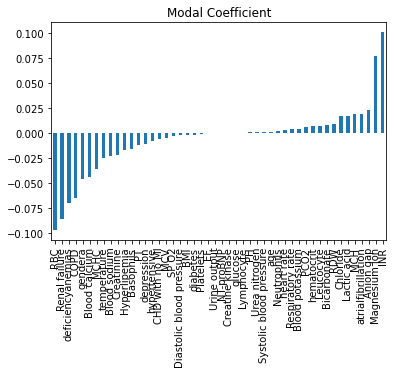

In [49]:

x=df.loc[:, df.columns != 'outcome'].values
y = df['outcome'].values


validation_size=0.20
seed=42

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=validation_size,random_state=seed)

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
alpha=1.0 #0.1
ridge =Ridge(alpha=alpha,normalize=False)


y_pred_ridge = ridge.fit(x_train,y_train).predict(x_test)
r2_score_ridge=r2_score(y_test,y_pred_ridge)
print("r^2 on test data: %f " % r2_score_ridge)
predictors=df.columns.values[1:]


coef=pd.Series(ridge.coef_,predictors).sort_values()
coef.plot(kind='bar',title='Modal Coefficient')

In [50]:
from sklearn.feature_selection import  SelectKBest,f_classif

x=df.loc[:, df.columns != 'outcome'].values
y = df['outcome'].values
z=df.iloc[:,0:48]

#suppose, we select 30 features with top 30 features score

selector=SelectKBest(f_classif,k=30)

X_new=selector.fit_transform(x,y)
names=z.columns.values[selector.get_support()]

 
scores=selector.scores_[selector.get_support()]
name_scores=list(zip(names,scores))
ns_df=pd.DataFrame(data=name_scores,columns=['Feat_names','F_scores'])

#sort the dataframe for better visualization
ns_df_sorted=ns_df.sort_values(['F_scores','Feat_names'],ascending=[False,True])
print(ns_df_sorted)


                  Feat_names   F_scores
14                       RDW  36.069694
18                 Basophils  33.163322
10                     SP O2  28.245413
28                        PH  27.533846
21                Creatinine  26.793377
16                 Platelets  23.399914
6                       COPD  23.130998
23              Blood sodium  21.934065
25                  Chloride  15.864273
27             Magnesium ion  12.924782
29               Bicarbonate  12.439569
8   Diastolic blood pressure  11.619890
13                       MCV  10.919469
3               hypertensive   9.455356
22                   glucose   9.031153
17               Neutrophils   8.732008
4                   diabetes   8.652405
5               Hyperlipemia   8.518046
12                      MCHC   8.061927
7                 heart rate   7.633650
15                 Leucocyte   7.490094
20                       INR   7.022822
26                 Anion gap   6.316998
1                    gendera   5.572435


[0.01623174 0.00273275 0.01808864 0.00171443 0.00263076 0.00168906
 0.00407505 0.00267182 0.00087412 0.00201352 0.00458531 0.00121814
 0.02875973 0.02484087 0.01849212 0.02511587 0.02699043 0.01850833
 0.02974213 0.02287354 0.01874041 0.02111458 0.02028931 0.02308519
 0.0238086  0.03469407 0.03684214 0.03223262 0.0155772  0.03769451
 0.01643972 0.02019903 0.02163181 0.01911892 0.02530826 0.03410771
 0.02128901 0.02648579 0.03696123 0.03350264 0.02949827 0.03498677
 0.02733435 0.03274425 0.03436996 0.02962634 0.02914799 0.00932095]


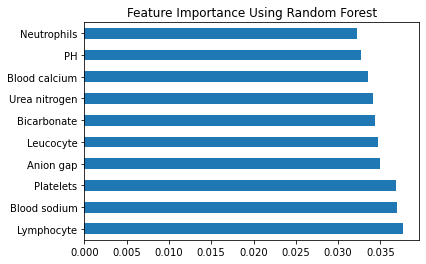

In [51]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

x=df.loc[:, df.columns != 'outcome']
y = df['outcome']

model = RandomForestClassifier()
model.fit(x,y)

print(model.feature_importances_) #use inbuilt class feature_importances of random based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance Using Random Forest")
plt.show()


Index(['age', 'BMI', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2', 'EF'],
      dtype='object')


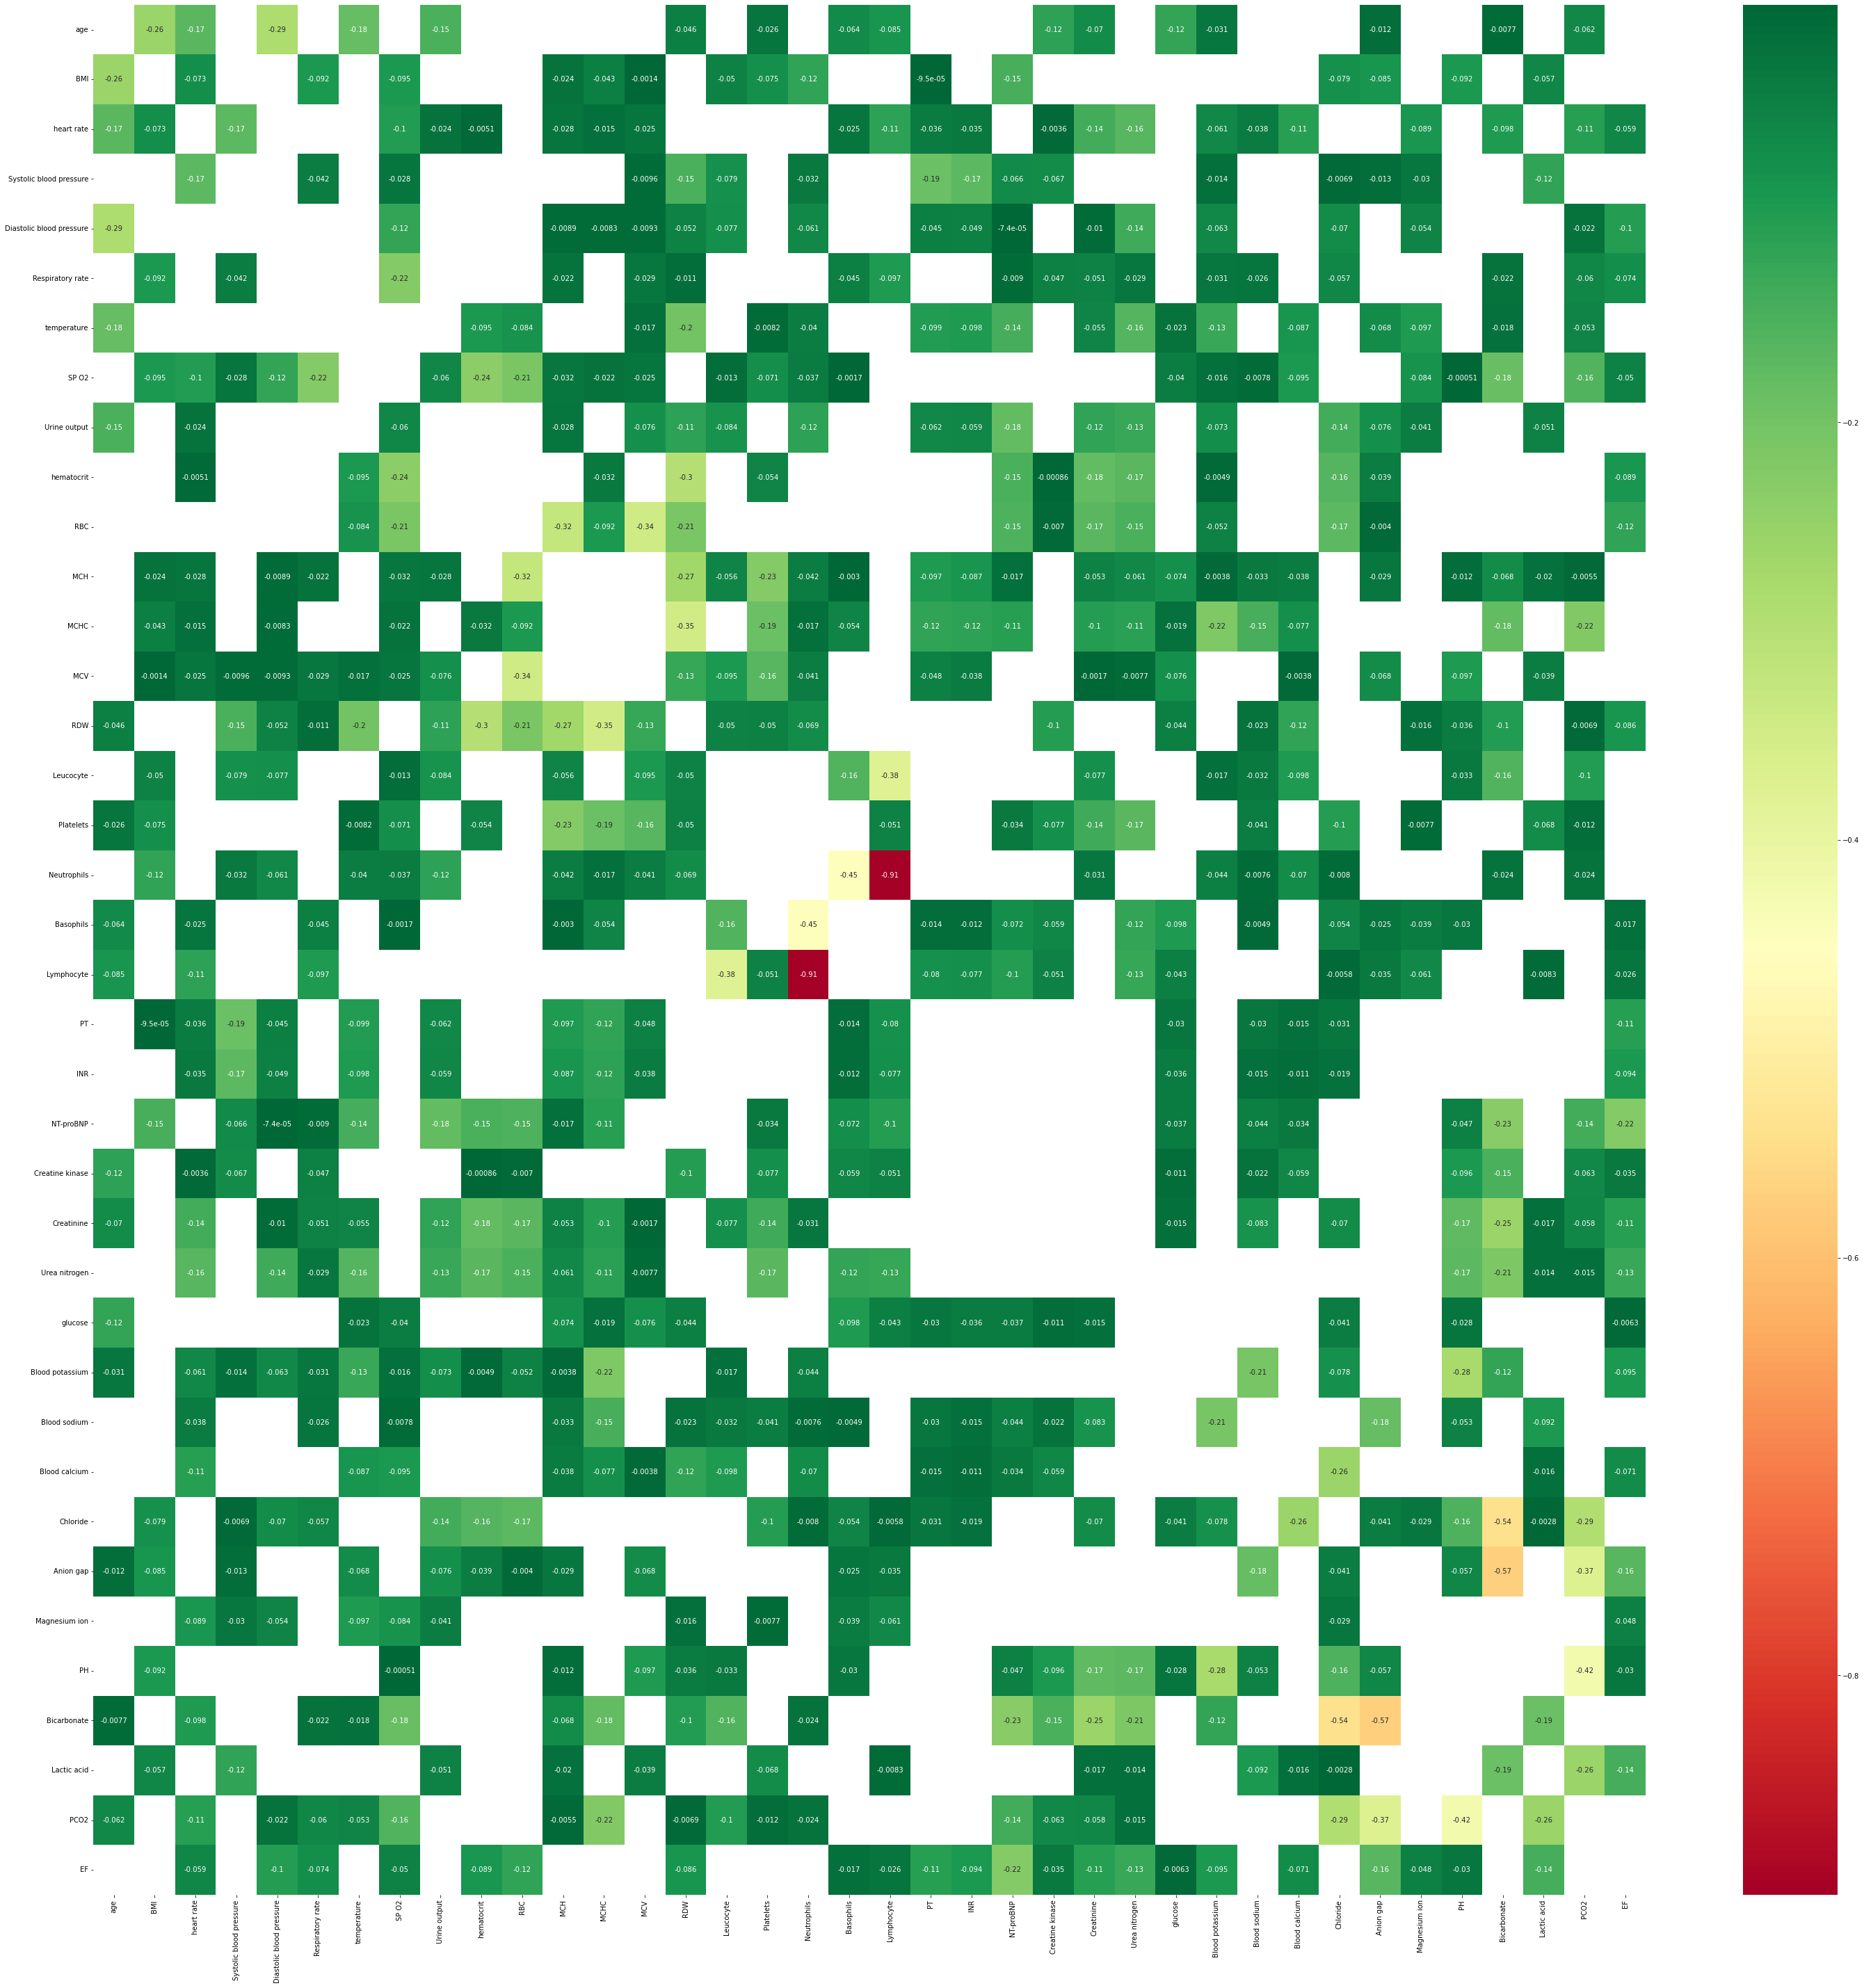

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn" ,mask =  corrmat >0.0)
print(top_corr_features)